## Assignment 2 Customer Analytics

### Vishanth Hari Raj  206310279

**Part (A) Product affinity based segmentation:**



Compute and report the characteristics of the affinity based segment for Product 3 (our candidate as given above). Report the characteristics in terms of the following descriptors: pPr30, pPr10, pPr05, pIn0.5, pIn1, pIn3, pCp12, pCp20, pCp32, pClD, pClF, pClE, pCnSl, pCnSp, pCnLk, pBrA, pBrB, pBrC, IPr, Iin, ICp, ICl, Icn, IBr, and the demographics income, age, sports and gradschl. For this you need to compute the weighted average of columns 2 through 29 weighted by the purchase probability of buying our product as given in column 32. You are  to load the data into python or R and compute the weighted averages in R or python; this is to help you build familiarity with these languages and prepare you better for your job. 

Repeat the step above for the product of brand A and the product for brand B, this time using the purcahse probabilities of buying those products as given in columns 30 and 31.  Compute also the overall mean for each descriptor (this done by a simple average of each descriptor across all 311 customers). Compute the log-lifts for all variables for the affinity based segment for each product and focus on the large positive and negative numbers to figure out how each segment is different from the other segments and the overall population average (A common thumb rule is to take base 10 absolute log lifts greater than 0.04  to be noteworthy and greater than 0.08 to be very noteworthy). You will use these in the next step to come up with a verbal description that characterizes each segment.)

Use your findings from Step 2 above to come up with a verbal description and a persona story that characterizes each segment. The persona  story gives a mental image to the marketing manager, not only in terms of the descriptors in the dataset, but also in terms of plausible hypothesized characteristics that go beyond the descriptors available. The suggested length for the persona description for each segment is 2-5 sentences. If you do use generative AI tools for this part of the HW (and indeed this is the part in this HW where such tools may help the most) then please be sure to document your work and submit for extra credit via Optional Task 3.


**I solved all the parts at one go by making functions which are used in creating a table which gives results for all the three products together.**

In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_excel('mugs-data-for-segmentation-exercise.xlsx')
print(len(data))
data.head()

311


Cust   pPr30   pPr10   pPr05  pIn0.5  pIn1  pIn3   pCp12   pCp20   pCp32  \
0     1       1       3       7       1     3     7       1       7       6   
1     2       1       6       7       1     4     7       1       7       6   
2     3       1       6       7       1     4     7       7       4       1   
3     4       1       6       7       1     4     7       7       1       3   
4     5       1       4       7       1     4     7       1       7       2   

   ...   ICl  Icn   IBr  income  age  sports  gradschl        P1        P2  \
0  ...     7   34    14      63   46       0         0  0.698892  0.083471   
1  ...    10   51    15      65   48       0         0  0.486721  0.373831   
2  ...     8   16     9      38   37       0         0  0.044146  0.862398   
3  ...    40   20    16      77   58       1         1  0.581424  0.045778   
4  ...     9    0    11      44   41       0         0  0.155494  0.558013   

         P3  
0  0.217637  
1  0.139448  
2  0.093456  
3  0.372798  
4  0.286493  

[5 rows x 32 columns]

In [26]:
# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Columns to compute weighted averages for (excluding 'Cust' and 'P1', 'P2', 'P3')
columns_to_average = data.columns[1:-3]  # This excludes the customer ID and probabilities for other products

columns_to_average = data.columns[1:-3]  # This excludes the customer ID and probabilities for other products

# Compute weighted averages
weighted_averages = (data[columns_to_average].multiply(data['P3'], axis=0)).sum() / data['P3'].sum()

weighted_averages


pPr30        1.000000
pPr10        5.015490
pPr05        7.000000
pIn0.5       1.000000
pIn1         3.914327
pIn3         7.000000
pCp12        3.096495
pCp20        5.327830
pCp32        3.879569
pClD         1.000000
pClF         4.870364
pClE         7.000000
pCnSl        1.000000
pCnSp        3.780847
pCnLk        7.000000
pBrA         3.891631
pBrB         3.608785
pBrC         4.463553
IPr         25.957759
Iin         11.139006
ICp         12.199318
ICl         21.128709
Icn         16.648585
IBr         12.966526
income      57.743197
age         46.473295
sports       0.448284
gradschl     0.448373
dtype: float64

In [25]:
# Update the function to use pandas.concat instead of append
def calculate_weighted_averages_v2(data, product_column_names):
    """
    Calculate weighted averages for each product based on the purchase probability for each product.
    :param data: DataFrame containing the data.
    :param product_column_names: List of column names for the product purchase probabilities.
    :return: DataFrame with weighted averages for each product.
    """
    # Initialize a DataFrame to store the weighted averages for each product
    weighted_averages_df = pd.DataFrame(columns=data.columns[1:-3])  # exclude 'Cust' and product probability columns

    # Calculate weighted averages for each product
    for product_col in product_column_names:
        weighted_averages = (data.iloc[:, 1:-3].multiply(data[product_col], axis=0)).sum() / data[product_col].sum()
        weighted_averages_df.loc[product_col] = weighted_averages

    # Calculate overall mean for each attribute and demographic
    overall_means = data.iloc[:, 1:-3].mean()
    overall_means.name = 'Overall Mean'

    # Concatenate the overall means to the results DataFrame
    weighted_averages_df = pd.concat([weighted_averages_df, pd.DataFrame(overall_means).T])

    return weighted_averages_df

# Call the updated function to calculate weighted averages for all products
all_products_weighted_averages_df_v2 = calculate_weighted_averages_v2(data, product_purchase_prob_columns)

all_products_weighted_averages_df_v2



pPr30     pPr10  pPr05  pIn0.5      pIn1  pIn3     pCp12  \
P1              1.0  4.919876    7.0     1.0  4.020961   7.0  3.266504   
P2              1.0  5.666979    7.0     1.0  4.133281   7.0  3.108512   
P3              1.0  5.015490    7.0     1.0  3.914327   7.0  3.096495   
Overall Mean    1.0  5.266881    7.0     1.0  4.041801   7.0  3.154341   

                 pCp20     pCp32  pClD  ...        IPr        Iin        ICp  \
P1            5.366698  3.789076   1.0  ...  18.047792  13.356015  16.360400   
P2            5.337524  3.970306   1.0  ...  38.982200   8.963664  12.163142   
P3            5.327830  3.879569   1.0  ...  25.957759  11.139006  12.199318   
Overall Mean  5.344051  3.890675   1.0  ...  29.125402  10.887460  13.472669   

                    ICl        Icn        IBr     income        age    sports  \
P1            18.474953  20.656958  13.116932  60.166276  46.711154  0.470745   
P2            14.565828  12.400454  12.891389  49.635778  42.849522  0.168137   
P3            21.128709  16.648585  12.966526  57.743197  46.473295  0.448284   
Overall Mean  17.475884  16.057878  12.980707  54.996785  44.983923  0.334405   

              gradschl  
P1            0.359619  
P2            0.247890  
P3            0.448373  
Overall Mean  0.334405  

[4 rows x 28 columns]

In [62]:
all_products_weighted_averages_df_v2.to_excel("weighted_average.xlsx",index=False)

In [42]:
import numpy as np

def calculate_log_lifts(data, product_column_names, overall_means):
    """
    Calculate log lifts for each product based on the purchase probability for each product and the overall mean.
    
    :param data: DataFrame containing the data.
    :param product_column_names: List of column names for the product purchase probabilities.
    :param overall_means: Series containing the overall mean for each descriptor.
    :return: DataFrame with log lifts for each product.
    """
    # Initialize a DataFrame to store the log lifts for each product
    log_lifts_df = pd.DataFrame(columns=data.columns[1:-3])  # exclude 'Cust' and product probability columns

    # Calculate weighted averages for each product
    weighted_averages_df = calculate_weighted_averages_v2(data, product_column_names)

    # Calculate log lifts for each product
    for product_col in product_column_names:
        log_lifts = np.log10(weighted_averages_df.loc[product_col] / overall_means)
        log_lifts_df.loc[product_col] = log_lifts

    # Filter the log lifts based on the thumb rule
    noteworthy_log_lifts_df = log_lifts_df[(log_lifts_df.abs() > 0.04) & (log_lifts_df.abs() < 0.08)]
    very_noteworthy_log_lifts_df = log_lifts_df[log_lifts_df.abs() >= 0.08]

    return log_lifts_df, noteworthy_log_lifts_df, very_noteworthy_log_lifts_df

# Calculate the overall means for each descriptor
overall_means_for_log_lifts = data.iloc[:, 1:-3].mean()

# Call the function to calculate log lifts for products of brand A and B
log_lifts, noteworthy_log_lifts, very_noteworthy_log_lifts = calculate_log_lifts(
    data, ['P1', 'P2', 'P3'], overall_means_for_log_lifts
)




In [43]:
# Append the very noteworthy log-lifts to the weighted averages DataFrame
f_df = pd.concat([log_lifts])

f_df



pPr30     pPr10         pPr05  pIn0.5      pIn1          pIn3     pCp12  \
P1    0.0 -0.029599  9.643275e-17     0.0 -0.002245  9.643275e-17  0.015175   
P2    0.0  0.031798  9.643275e-17     0.0  0.009720  9.643275e-17 -0.006356   
P3    0.0 -0.021240  9.643275e-17     0.0 -0.013918  9.643275e-17 -0.008038   

       pCp20     pCp32  pClD  ...       IPr       Iin       ICp       ICl  \
P1  0.001837 -0.011492   0.0  ... -0.207848  0.088750  0.084340  0.024144   
P2 -0.000531  0.008799   0.0  ...  0.126594 -0.084441 -0.044408 -0.079104   
P3 -0.001320 -0.001241   0.0  ... -0.050005  0.009920 -0.043118  0.082434   

         Icn       IBr    income       age    sports  gradschl  
P1  0.109378  0.004534  0.039016  0.016363  0.148513  0.031570  
P2 -0.112251 -0.002999 -0.044542 -0.021111 -0.298609 -0.130014  
P3  0.015689 -0.000475  0.021164  0.014146  0.127280  0.127366  

[3 rows x 28 columns]

In [63]:
f_df.to_excel("log_lift.xlsx",index=False)



Product 1 (Brand A) Segment Profile:

Less Price Sensitive: Customers in this segment are less influenced by price when making their purchasing decisions compared to the general population. This could indicate a focus on quality or specific features over cost.
Value Insulation Time: There's a marked preference for insulation time, suggesting that these consumers are likely to value the ability to keep beverages at the desired temperature for longer periods.

Capacity Matters: A higher importance is placed on the mug's capacity, indicating a preference for larger sizes that can hold more liquid.
Containment is Key: This segment shows a significant appreciation for containment features, such as leak or spill resistance. This might reflect a lifestyle that includes outdoor activities or mobility, where such features are highly valued.
Physically Active: Consumers are more likely to be sports-active, perhaps aligning with an on-the-go lifestyle that requires durable and functional mugs for hydration.

Product 2 (Brand B) Segment Profile:
Price Sensitive: Customers in this segment are more price-sensitive, indicating that cost is a significant factor in their purchasing decisions. This segment is likely looking for value purchases.
Less Concerned with Insulation: Insulation time is less of a concern for this segment, suggesting they may use the mugs in situations where the drink's temperature is maintained for shorter periods, or they simply value this feature less.
Lower Importance of Containment: The lower importance of containment features could suggest that these customers may use the mugs in more controlled environments where spills or leaks are less of a concern.
Less Likely to be Sports Active: This segment is less likely to be sports active, which may correlate with a less mobile lifestyle or simply different priorities in their beverage consumption habits.
Lower Educational Attainment: There's a lower likelihood of having a master’s degree or higher, which might correlate with different lifestyle choices and purchasing power or priorities.
These profiles paint a picture of two distinct customer bases, with Brand A's product appealing to a more active, feature-focused segment and Brand B's product attracting cost-conscious consumers who prioritize practicality over advanced features.

With these insights, marketing strategies can be tailored for each product. For example, Product 1's marketing could focus on durability and advanced features, targeting consumers with active lifestyles. In contrast, Product 2's marketing might emphasize affordability and basic functionality, targeting budget-conscious consumers looking for practical solutions.

**Part (B) Classical segmentation:**

**Question 1:** 
Compute and report the characteristics of all segments. Report the characteristics in terms of the average value, for each segment, of each of the following variables: IPr, Iin, ICp, ICl, ICn, IBr, pPr30, pPr10, pPr05, pIn0.5, pIn1, pIn3, pCp12, pCp20, pCp32, pClD, pClF, pClE, pCnSl, pCnSp, pCnLk, pBrA, pBrB, pBrC. Also, do profiling in terms of the demographics: income, age, sports and gradschl. "Profiling" means reporting the average value, for each segment, of each  descriptor that was excluded from the kmeans analysis's inputs. In this case, the excluded variables are:income, age, sports and gradschl.


**Question 2:** 
Compute the log-lifts for all variables for all segments and focus on the large positive and negative numbers  to figure out how each segment is different from the other segments and the overall population average. You will use these in the next step to come up with a verbal description that characterizes each segment.  The log lift for any variable "x" for any segment "s" is  Log( (unweighted average of "x" across all persons within segment "s")/(unweighted average of x across all persons regardless of segment)).

**Question 3:** 
Use your findings from Step 2 above to come up with a verbal description and a persona story that characterizes each segment. The persona  story gives a mental image to the marketing manager  not only in terms of the descriptors in the dataset, but also in terms of plausible hypothesized characteristics that go beyond the descriptors available.  Here too, if you do use generative AI tools, then please be sure to document your work and submit for extra credit via Optional Task 3.

In [40]:
import random
from sklearn.cluster import KMeans
import seaborn as sns

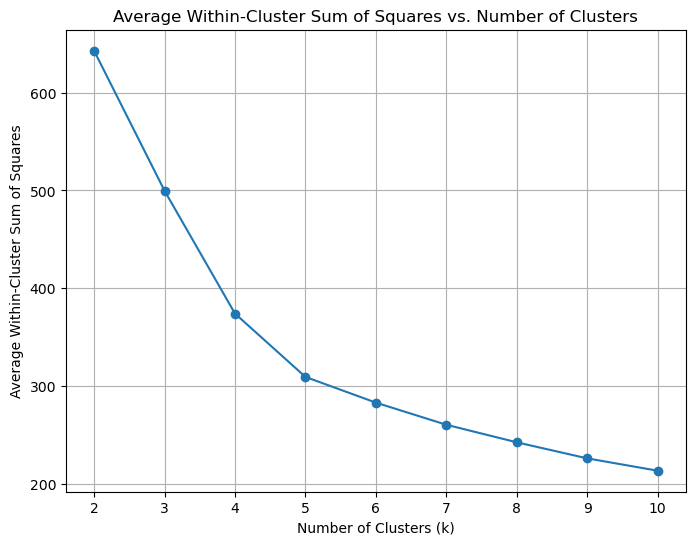

In [67]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

random.seed(410014)
# Load the relevant attributes from the dataset for clustering
# Note: 'data' is the DataFrame that was loaded previously
clustering_variables = [
    'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12', 'pCp20', 'pCp32', 
    'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk', 'pBrA', 'pBrB', 'pBrC', 
    'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr'
]

# Subset the DataFrame with the relevant variables
X = data[clustering_variables].values

# Set up the k range
k_values = range(2, 11)

# Initialize list to store the average within-cluster sum of squares for each k
ave_within_cluster_mean_sum_of_squares_list = []

# Set the random seed
np.random.seed(410014)

# Perform k-means clustering for each value of k
for k in k_values:
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(X)
    ave_within_cluster_mean_sum_of_squares = kmeansModel.inertia_ / X.shape[0]
    ave_within_cluster_mean_sum_of_squares_list.append(ave_within_cluster_mean_sum_of_squares)


# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, ave_within_cluster_mean_sum_of_squares_list, marker='o')
plt.title('Average Within-Cluster Sum of Squares vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [45]:
# Based on the elbow method, we chose the best value of "k" as 5
best_k = 5

# Set the random seed again before the kmeans run
np.random.seed(410014)

# Run k-means clustering with the chosen "k"
best_kmeans_model = KMeans(n_clusters=best_k, n_init=50, max_iter=100)
best_kmeans_model.fit(X)

# Get the cluster assignments for each data point
cluster_assignments = best_kmeans_model.labels_

# Add the cluster assignments to the original DataFrame
data['Cluster'] = cluster_assignments

# Calculate the average value of each variable for each cluster
cluster_characteristics = data.groupby('Cluster')[clustering_variables + ['income', 'age', 'sports', 'gradschl']].mean()

# Calculate the percentage of customers in each segment
cluster_sizes = data['Cluster'].value_counts(normalize=True) * 100
cluster_sizes.name = 'Percentage of Customers'

# Combine the characteristics and sizes into a single DataFrame
cluster_report = pd.concat([cluster_characteristics, cluster_sizes], axis=1)

cluster_report


pPr30     pPr10  pPr05  pIn0.5      pIn1  pIn3     pCp12     pCp20  \
Cluster                                                                       
0          1.0  5.556338    7.0     1.0  4.049296   7.0  2.852113  5.169014   
1          1.0  4.727273    7.0     1.0  4.606061   7.0  3.363636  4.787879   
2          1.0  5.190476    7.0     1.0  3.976190   7.0  2.761905  5.428571   
3          1.0  4.900000    7.0     1.0  4.075000   7.0  4.375000  6.000000   
4          1.0  5.166667    7.0     1.0  3.703704   7.0  3.222222  5.592593   

            pCp32  pClD  ...        Iin        ICp        ICl        Icn  \
Cluster                  ...                                               
0        4.225352   1.0  ...   7.964789   8.781690  12.591549  11.345070   
1        3.939394   1.0  ...  29.575758  12.303030  14.363636  14.606061   
2        4.285714   1.0  ...   8.571429   9.714286  12.238095  43.166667   
3        2.825000   1.0  ...   9.450000  41.975000  10.975000  11.000000   
4        3.462963   1.0  ...  10.018519   8.333333  41.111111  12.000000   

               IBr     income        age    sports  gradschl  \
Cluster                                                        
0        12.887324  47.401408  42.225352  0.105634  0.288732   
1        12.969697  58.757576  45.212121  0.666667  0.363636   
2        13.571429  62.380952  46.857143  0.357143  0.285714   
3        12.850000  59.100000  44.825000  0.275000  0.025000   
4        12.870370  63.888889  50.759259  0.759259  0.703704   

         Percentage of Customers  
Cluster                           
0                      45.659164  
1                      10.610932  
2                      13.504823  
3                      12.861736  
4                      17.363344  

[5 rows x 29 columns]

In [46]:
# Add a 'Segment' column for identification
cluster_report['Segment'] = ['Segment 0', 'Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']

# Reorder columns to have 'Segment' as the first column
cluster_report = cluster_report[['Segment'] + [col for col in cluster_report.columns if col != 'Segment']]

cluster_report


Segment  pPr30     pPr10  pPr05  pIn0.5      pIn1  pIn3     pCp12  \
Cluster                                                                        
0        Segment 0    1.0  5.556338    7.0     1.0  4.049296   7.0  2.852113   
1        Segment 1    1.0  4.727273    7.0     1.0  4.606061   7.0  3.363636   
2        Segment 2    1.0  5.190476    7.0     1.0  3.976190   7.0  2.761905   
3        Segment 3    1.0  4.900000    7.0     1.0  4.075000   7.0  4.375000   
4        Segment 4    1.0  5.166667    7.0     1.0  3.703704   7.0  3.222222   

            pCp20     pCp32  ...        Iin        ICp        ICl        Icn  \
Cluster                      ...                                               
0        5.169014  4.225352  ...   7.964789   8.781690  12.591549  11.345070   
1        4.787879  3.939394  ...  29.575758  12.303030  14.363636  14.606061   
2        5.428571  4.285714  ...   8.571429   9.714286  12.238095  43.166667   
3        6.000000  2.825000  ...   9.450000  41.975000  10.975000  11.000000   
4        5.592593  3.462963  ...  10.018519   8.333333  41.111111  12.000000   

               IBr     income        age    sports  gradschl  \
Cluster                                                        
0        12.887324  47.401408  42.225352  0.105634  0.288732   
1        12.969697  58.757576  45.212121  0.666667  0.363636   
2        13.571429  62.380952  46.857143  0.357143  0.285714   
3        12.850000  59.100000  44.825000  0.275000  0.025000   
4        12.870370  63.888889  50.759259  0.759259  0.703704   

         Percentage of Customers  
Cluster                           
0                      45.659164  
1                      10.610932  
2                      13.504823  
3                      12.861736  
4                      17.363344  

[5 rows x 30 columns]

In [66]:
cluster_report.to_excel("cluster_report.xlsx", index=False)

In [47]:
overall_means_for_log_lift = data[clustering_variables + ['income', 'age', 'sports', 'gradschl']].mean()

# Calculate log lifts for each segment
log_lifts_segments = np.log10(cluster_characteristics / overall_means_for_log_lift)

log_lifts_segments

pPr30     pPr10  pPr05  pIn0.5      pIn1  pIn3     pCp12     pCp20  \
Cluster                                                                       
0          0.0  0.023235    0.0     0.0  0.000805   0.0 -0.043742 -0.014463   
1          0.0 -0.046943    0.0     0.0  0.056755   0.0  0.027900 -0.047727   
2          0.0 -0.006346    0.0     0.0 -0.007108   0.0 -0.057700  0.006815   
3          0.0 -0.031357    0.0     0.0  0.003553   0.0  0.142069  0.050281   
4          0.0 -0.008343    0.0     0.0 -0.037939   0.0  0.009247  0.019743   

            pCp32  pClD  ...       IPr       Iin       ICp       ICl  \
Cluster                  ...                                           
0        0.035838   0.0  ...  0.202523 -0.135752 -0.185876 -0.142360   
1        0.005404   0.0  ... -0.259330  0.434009 -0.039442 -0.085175   
2        0.041998   0.0  ... -0.354324 -0.103873 -0.142043 -0.154725   
3       -0.139007   0.0  ... -0.329139 -0.061495  0.493537 -0.202035   
4       -0.050577   0.0  ... -0.267758 -0.036123 -0.208635  0.371520   

              Icn       IBr    income       age    sports  gradschl  
Cluster                                                              
0       -0.150881 -0.003136 -0.064546 -0.027484 -0.500470 -0.063777  
1       -0.041155 -0.000369  0.028727  0.002198  0.299636  0.036394  
2        0.429460  0.019327  0.054715  0.017718  0.028569 -0.068341  
3       -0.164295 -0.004395  0.031250 -0.001537 -0.084940 -1.126333  
4       -0.126507 -0.003707  0.065088  0.052458  0.356117  0.323117  

[5 rows x 28 columns]

In [65]:
log_lifts_segments.to_excel("log_lifts_segments.xlsx",index=False)

Segment 0:
Lower Importance in Attributes: This segment shows notably lower importance and preference across several attributes (e.g., ICp, ICl, Icn), suggesting they are less concerned about specific product features.
Lower Sports Activity: Significantly less likely to be sports active.
Income and Age: Slightly lower than the overall average, which may indicate a more price-sensitive or younger demographic.
Segment 1:
Higher Importance of Price and Cleanability: More sensitive to price with high log-lift in IPr, showing a tendency to value cost over other attributes.
Sports and Graduate School: More likely to be sports active and have a graduate degree, indicating a possibly more affluent and health-conscious demographic.
Segment 2:
High Importance of Containment (Icn): Far more concerned with containment features than the average, possibly indicating a need for very reliable or secure products.
Moderately Higher Income and Age: Reflects a possibly more established, possibly family-oriented demographic.
Segment 3:
Exceptional Importance of Capacity (ICp): This segment values larger capacities highly, which might indicate preferences for products that can hold more or serve longer usage without refilling.
Lower Graduate School Rate: Significantly lower levels of graduate education, potentially indicating different lifestyle or professional needs.
Segment 4:
High Importance of Cleanability (ICl): Indicates a preference for easy-to-maintain products, possibly due to a busier lifestyle or higher standards for convenience and usability.
Higher Sports Activity and Graduate School: The most educationally advanced and physically active, suggesting a demographic that values health and education highly.

#### Optional

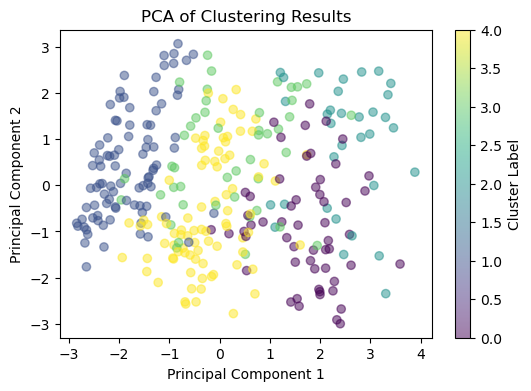

In [69]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and clustering_variables lists all relevant column names
clustering_variables = [
    'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12', 'pCp20', 'pCp32', 
    'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk', 'pBrA', 'pBrB', 'pBrC', 
    'IPr', 'Iin', 'ICp', 'ICl', 'Icn', 'IBr'
]

# Ensure that X is extracted from data using the specified clustering_variables
X = data[clustering_variables].values

# Standardize the X matrix to make PCA operate on correlations instead of covariances
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Run K-Means clustering
kmeansModel = KMeans(n_clusters=5, n_init=50, max_iter=100)
kmeansModel.fit(X_std)
labels = kmeansModel.labels_

# Perform PCA with 2 components
pca_2 = PCA(n_components=2)
plot_columns = pca_2.fit_transform(X_std)

# Visualize the first two principal components
plt.figure(figsize=(6, 4))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels, cmap='viridis', alpha=0.5)
plt.title('PCA of Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



In [60]:
# Display PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_cleaned.columns)
print(loadings)


            PC1       PC2
pPr10 -0.135982  0.060125
pIn1   0.042543 -0.084724
pCp12  0.151764  0.536126
pCp20  0.059140  0.073667
pCp32 -0.151557 -0.557249
pClF  -0.003442  0.184718
pCnSp  0.068099  0.250942
pBrA   0.486198 -0.019138
pBrB  -0.045122 -0.239223
pBrC  -0.446558  0.236875
IPr   -0.507277  0.041202
Iin    0.246125 -0.172614
ICp    0.336865  0.186898
ICl   -0.057928  0.152102
Icn    0.228331 -0.249222
IBr    0.028911 -0.152822


Insights from PCA Loadings:
The PCA loadings describe how each variable influences the principal components. For example:

PC1 seems heavily influenced by the importance customers place on price (IPr) and preference for Brand A (pBrA), with a significant negative loading for IPr and a strong positive loading for pBrA.
PC2 shows a strong positive loading for capacity preference at pCp12 and a strong negative loading for pCp32, indicating that this dimension might represent the trade-off between preferring smaller or larger capacities.
Recommendations for Brand C:
Segment with Preference for Larger Capacities (pCp32):
Product Offering: Since there is a significant cluster with a strong negative loading on PC2 for pCp32, it suggests that a segment prefers larger capacities. Brand C could introduce a larger capacity mug that is competitively priced and focuses on essential features that appeal to this segment.
Price-Sensitive Segment (IPr):
Product Offering: With a significant negative loading on PC1 for IPr, there's a clear segment that is highly price-sensitive. Brand C should consider offering a value product that meets basic needs without unnecessary features that add cost.
Brand-Conscious Segments (pBrA, pBrB, pBrC):
Product Offering: The loadings indicate distinct brand preferences. While some are strongly inclined towards Brand A (pBrA), there's also a noticeable inclination against Brand C (pBrC). Brand C needs to build its brand equity through marketing, focusing on unique selling propositions that differentiate it from Brand A and B.
When applying the "Three Cs" for strategy development:

Company (Capabilities and Goals):
Brand C should evaluate internal capabilities, including resources, technology, and expertise, to determine which segment it can serve most effectively.
Innovation and design can be leveraged if Brand C has strengths in R&D.
Customers (Needs and Preferences):
Assess the needs and desires of each segment, focusing on the product attributes that are important to them.
Prioritize segments that are growing, underserved, or demonstrate higher profitability.
Competitors (Market Position and Offerings):
Consider the competitive landscape and how competitors are positioned in terms of pricing, brand strength, and product offerings.
Identify gaps in the market that Brand C can fill.